HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

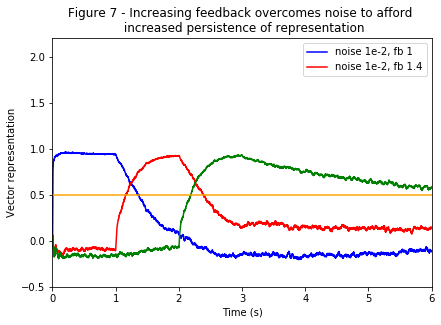

In [2]:
import nengo
import nengo_spa as spa
import matplotlib.pyplot as plt
%matplotlib inline
# with and without seed
import numpy as np
import random
import numpy as np
import pickle
d = 128  # the dimensionality of the vectors
# note dimension
SDT_variable = 1
proportion_ablate = 0.0
noise_std = 0.01
time_interval = 1.0
wait =  0.0
feedback_synapse = 0.1

with spa.Network() as model:
        
       
        feedback = 1.5       
 
            
        noise = nengo.Node(nengo.processes.WhiteNoise(nengo.dists.Gaussian (0,noise_std)), size_out = d)
        timer = time_interval + wait
        vocab = spa.Vocabulary(d)
        vocab.populate('BLUE; RED; GREEN')
        GREEN = vocab.parse('GREEN')
        RED = vocab.parse('RED')
        BLUE = vocab.parse('BLUE')
            
       
        Color = spa.State(vocab, feedback = feedback, represent_cc_identity = False)
        
        nengo.Connection(noise,Color.input, synapse = 0.01)
        
        
        def input(t):
                if t < time_interval:
                    return BLUE
                elif t < timer:
                    return '0'
                elif t < timer + time_interval:
                    return RED
                elif t < 2 * timer:
                    return '0'
                elif t < 2 * timer + time_interval:
                    return GREEN
                elif t < 3 * timer:
                    return '0'
                else:
                    return '0'
        
        
        color_trans = spa.Transcode(function = input, output_vocab = vocab)
        color_trans >> Color
        probe_Color = nengo.Probe(Color.output, synapse = 0.01) 
        
        def ablate_ensemble(ens, proportion_ablate, sim, bias=True):
                n_neurons = min(int(ens.n_neurons * proportion_ablate), ens.n_neurons)
                idx = np.random.choice(np.arange(ens.n_neurons), replace=False, size=n_neurons)
                encoder_sig = sim.signals[sim.model.sig[ens]['encoders']]
                encoder_sig.setflags(write=True)
                encoder_sig[idx] = 0.0
                encoder_sig.setflags(write=False)
                if bias:

                    bias_sig = sim.signals[sim.model.sig[ens.neurons]['bias']]
                    bias_sig.setflags(write=True)
                    bias_sig[idx] = -1000



        
        with nengo.Simulator(model) as sim:  # Create the simulator
                for j in range (0, int(d/16)):
                    ens = Color.all_ensembles[j]
                    ablate_ensemble(ens, proportion_ablate, sim )
               
                sim.run(timer * 6)  
        
        numbers  = spa.similarity(sim.data[probe_Color], vocab, normalize = True)
                
        numbers_array = np.asarray(numbers)   
                 
        pickle.dump(numbers, open("data_em2fb_15", "wb"))
        graph_n_em2fb_15 = pickle.load(open("data_em2fb_15", "rb"))
        #sally_n_em2fb_1 = pickle.load(open("n_em2fb_1", "rb"))
        plt.figure()
        xmin, xmax = 0, 6
        ymin, ymax = -0.5, 2.2
        x_range = np.linspace(0,6.0, 6000)
        plt.plot(x_range,graph_n_em2fb_15[:,0], 'b-', label = 'blue noise std 1e-2, fb 1.5' )
        plt.plot(x_range,graph_n_em2fb_15[:,1], 'r-', label = 'red noise std 1e-2, fb 1.5' )
        plt.plot(x_range,graph_n_em2fb_15[:,2], 'g-', label = 'green noise std 1e-2, fb 1.5' )
        
       
        
        left_pt = [0,0.5]
        right_pt = [6,0.5]
        x_pts = [left_pt[0], right_pt[0]]
        y_pts = [left_pt[1], right_pt[1]]
        plt.plot(x_pts, y_pts, color = "orange")
        
        
        plt.legend(['noise 1e-2, fb 1', 'noise 1e-2, fb 1.4'],  loc='best')
        plt.tight_layout()
        
        plt.title("Figure 7 - Increasing feedback overcomes noise to afford \n increased persistence of representation")
        plt.xlabel("Time (s)")
        plt.ylabel("Vector representation")
        plt.ylim(ymin, ymax)
        plt.xlim(xmin, xmax)
        plt.savefig('Figure7_June26.pdf')
        
        feedback = 1.0    
 
            
        noise = nengo.Node(nengo.processes.WhiteNoise(nengo.dists.Gaussian (0,noise_std)), size_out = d)
        timer = time_interval + wait
        vocab = spa.Vocabulary(d)
        vocab.populate('BLUE; RED; GREEN')
        GREEN = vocab.parse('GREEN')
        RED = vocab.parse('RED')
        BLUE = vocab.parse('BLUE')
            
       
        Color = spa.State(vocab, feedback = feedback, represent_cc_identity = False)
        
        nengo.Connection(noise,Color.input, synapse = 0.01)
        
        
        def input(t):
                if t < time_interval:
                    return BLUE
                elif t < timer:
                    return '0'
                elif t < timer + time_interval:
                    return RED
                elif t < 2 * timer:
                    return '0'
                elif t < 2 * timer + time_interval:
                    return GREEN
                elif t < 3 * timer:
                    return '0'
                else:
                    return '0'
        
        
        color_trans = spa.Transcode(function = input, output_vocab = vocab)
        color_trans >> Color
        probe_Color = nengo.Probe(Color.output, synapse = 0.01) 
        
        def ablate_ensemble(ens, proportion_ablate, sim, bias=True):
                n_neurons = min(int(ens.n_neurons * proportion_ablate), ens.n_neurons)
                idx = np.random.choice(np.arange(ens.n_neurons), replace=False, size=n_neurons)
                encoder_sig = sim.signals[sim.model.sig[ens]['encoders']]
                encoder_sig.setflags(write=True)
                encoder_sig[idx] = 0.0
                encoder_sig.setflags(write=False)
                if bias:

                    bias_sig = sim.signals[sim.model.sig[ens.neurons]['bias']]
                    bias_sig.setflags(write=True)
                    bias_sig[idx] = -1000



        
        with nengo.Simulator(model) as sim:  # Create the simulator
                for j in range (0, int(d/16)):
                    ens = Color.all_ensembles[j]
                    ablate_ensemble(ens, proportion_ablate, sim )
               
                sim.run(timer * 6)  
        
        numbers  = spa.similarity(sim.data[probe_Color], vocab, normalize = True)
                
        numbers_array = np.asarray(numbers)   
                 
        pickle.dump(numbers, open("data_em2fb_10", "wb"))
        graph_n_em2fb_10 = pickle.load(open("data_em2fb_10", "rb"))
        
        
        plt.figure()
        xmin, xmax = 1, 1.5
        ymin, ymax = -0.5, 1.2
        x_range = np.linspace(0,6.0, 6000)
        plt.plot(x_range, graph_n_em2_fb10[:,0], 'b-', label = "blue, noise fb 1.0")
        left_pt = [0,0.5]
        right_pt = [5,0.5]
        x_pts = [left_pt[0], right_pt[0]]
        y_pts = [left_pt[1], right_pt[1]]
        plt.plot(x_pts, y_pts, color = "black")
        
        
        plt.legend(['noise 1e-2, fb 1', 'noise 1e-2, fb 1.4'],  loc='best')
        plt.tight_layout()
        
        plt.title("Figure 9a - Increasing feedback compensates for noise, at the cost of increased slowing")
        plt.xlabel("Time (s)")
        plt.ylabel("Vector representation")
        plt.ylim(ymin, ymax)
        plt.xlim(xmin, xmax)
        
        bb=np.array([1])
        plt.plot(bb * 1.092,bb * 0.69,marker="H", fillstyle='none', markersize=20, linewidth=0)
        plt.plot(bb * 1.22,bb * 0.69,marker="H", fillstyle='none', markersize=20, linewidth=0)
        
        plt.savefig('Figure9a.pdf')
        
        '''
        
                                                       
        
        
